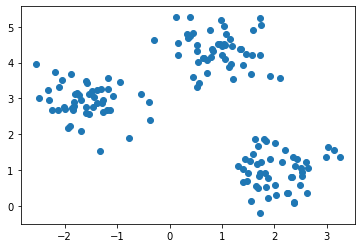

In [114]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X,y = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,shuffle=True,random_state=0)
plt.scatter(X[:,0],X[:,1])

In [117]:
import pandas as pd

k = int(input('请输入k值：'))
X = pd.DataFrame(X)
sam = X.sample(n=k,random_state=0,axis=0)
sam

请输入k值：3


,0,1
114,0.981520,5.196723
62,-1.682347,2.966582
33,-1.758702,3.158623


In [118]:
import math
import numpy as np
from collections import Counter

X = np.array(X)
sam =np.array(sam)
n = 10
dis = []
def kmeans(X,sam,n,dis):
    if n == 0:
        print(dis)
    
    else:
        #print(sam)
        dis_ind = []#计算得出归属标签
        for i in X:
            single_dis = []#距离列表
            #计算每个点到三个随机点最近的距离
            for j in sam:
                dis = math.sqrt(np.sum((i - j)**2))
                single_dis.append(dis)

            #找到最近点的标签和值并加入一个列表
            near = np.argsort(single_dis)[0]#按最小排序的标签,取最小的,即三个随机点的索引
            dis_ind.append(near)#最近点标签
        #print(dis_ind)

        count = [i[0] for i in Counter(dis_ind).most_common()]#分类标签

        dic = {}
        for i in range(len(count)):
            dic[i]=[]

        for i in range(len(X)):
            for j in count:
                if dis_ind[i] == j:
                    dic[j].append(list(X[i]))
                    break

        #计算各簇中心点
        new_sam = []
        for i in range(len(count)):
            new_x = np.mean(np.array(dic[i])[0])
            new_y = np.mean(np.array(dic[i])[1])
            new_sam.append((new_x,new_y))
        sam = np.array(new_sam)
        #迭代
        n = n-1
        kmeans(X,sam,n,dis_ind)
        
    
kmeans(X,sam,n,dis)

[0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1]


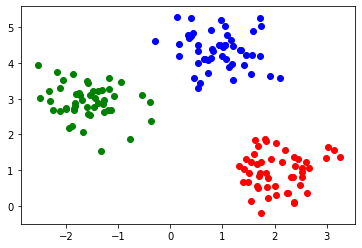

In [119]:
import matplotlib.pyplot as plt

index = [0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0]
data = pd.DataFrame(np.c_[X,np.array(index).reshape(-1,1)])
zero = data[data[2]==0]
one = data[data[2]==1]
two = data[data[2]==2]

plt.scatter(zero.iloc[:,0],zero.iloc[:,1],c='r')
plt.scatter(one.iloc[:,0],one.iloc[:,1],c='b')
plt.scatter(two.iloc[:,0],two.iloc[:,1],c='g')